# Random Forest

In [23]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import pickle

# Package to implement Random Forest
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Categorical Columns:
# Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue

# Numerical Columns:
# Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay

Categorical Columns:
Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue

Numerical Columns:
Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay

In [26]:
# Import Data
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [27]:
# Dropping null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [28]:
# Selecting data correponding to Input Features X and Outcome y
X = df.drop('Revenue', axis=1)

# Output column for prediction
y = df['Revenue'] 

# One-hot encoding to handle categorical variables
X = pd.get_dummies(X)

# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


#### Hyperparameter Tuning

In [29]:
# Define your model
classifier = RandomForestClassifier(random_state = 42)

In [30]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [31]:
# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

In [32]:
# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier,
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs

In [33]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training time: 95.76228380203247s


In [34]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.8022737272653583
Initial parameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 12}


In [35]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [11, 12, 13],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [180, 200, 220]
}

pprint(param_grid)

{'max_depth': [11, 12, 13],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [180, 200, 220]}


In [36]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = param_grid,
                        scoring= 'f1_macro',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [37]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Training time: 155.80792593955994s


In [38]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.8034967163205476
Improved parameters:  {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


#### Confusion Matrix

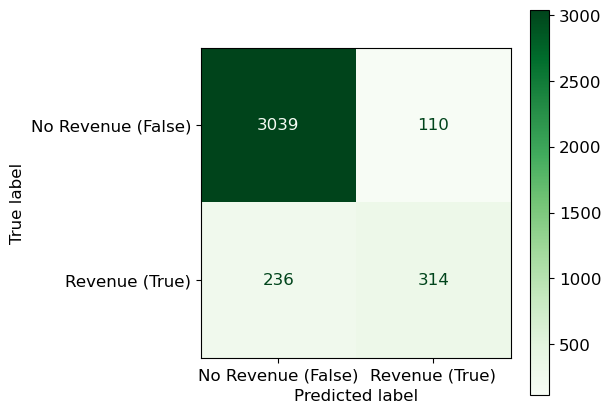

In [39]:
class_names = ['No Revenue (False)', 'Revenue (True)']

# Predictions on test set
y_pred = model_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Greens', ax = ax);

# Saving Confusion Matrix
fig.savefig("rf_confusion_mat.svg", bbox_inches = 'tight')

#### Classification Report

In [40]:
class_names = ['No Revenue (False)', 'Revenue (True)']

# Generating Classification Report
report_df = pd.DataFrame(classification_report(test_y, y_pred, target_names=class_names, output_dict=True)).transpose()

# Save the report as a CSV File
report_df.to_csv('rf_class_report.csv') 
report_df

,precision,recall,f1-score,support
No Revenue (False),0.927939,0.965068,0.946139,3149.000000
Revenue (True),0.740566,0.570909,0.644764,550.000000
accuracy,0.906461,0.906461,0.906461,0.906461
macro avg,0.834252,0.767989,0.795452,3699.000000
weighted avg,0.900079,0.906461,0.901328,3699.000000


#### Feature Importance Plot

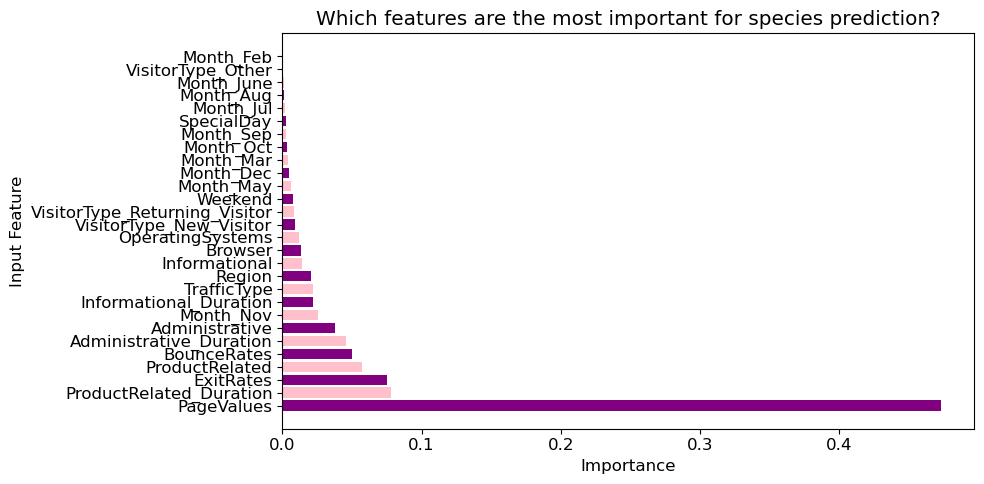

In [41]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("rf_feature_imp.svg")

#### Prediction Probabilities

In [42]:
# Getting prediction probabilities
prob = model_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for each price range's probability
fetal_health_columns = ['No Revenue (False)', 'Revenue (True)']
prob_df = pd.DataFrame(prob, columns=fetal_health_columns, index=result.index)

# Concatenating the result with probabilities
result = pd.concat([result, prob_df], axis=1)

# Display the result
display(result.head(10))

# Saving the dataframe as a CSV file
result.to_csv('rf_Prediction_Results.csv', index=False)

,Actual,Predicted,No Revenue (False),Revenue (True)
5487,False,False,0.986366,0.013634
7736,True,False,0.576141,0.423859
5310,False,False,0.999709,0.000291
2982,False,False,0.977013,0.022987
662,False,False,0.981442,0.018558
6711,True,False,0.790975,0.209025
1312,False,False,0.983019,0.016981
2012,True,False,0.719189,0.280811
7166,True,True,0.251007,0.748993
10567,False,False,0.859263,0.140737


### Pickle Random Forest

In [43]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('random_forest.pickle', 'wb') 

# Write model to the file
pickle.dump(model_cv, rf_pickle) 

# Close the file
rf_pickle.close() 